In [1]:
import sqlite3
import matplotlib.pyplot as plt

# უკავშირდება მონაცემთა ბაზას
conn = sqlite3.connect("movies&shows.db")
cursor = conn.cursor()

In [2]:
#აჩვენებს პირველ 10 ფილმს ბაზიდან
def show_movies():
    cursor.execute("SELECT title, director, \"cast\", release_year FROM netflix WHERE type = 'Movie' LIMIT 10;")
    movies = cursor.fetchall()

    print("\nMovies:")
    for movie in movies:
        title = movie[0] or "Unknown Title"
        director = movie[1] or "Unknown Director"
        cast = movie[2] or "Unknown Cast"
        year = movie[3] or "Unknown Year"

        print("Title:", title)
        print("Director:", director)
        print("Cast:", cast)
        print("Year:", year)
        print("------")

In [3]:
#აჩვენებს პირველ 10 სერიალს ბაზიდან
def show_tv_shows():
    cursor.execute("SELECT title, director, \"cast\", release_year FROM netflix WHERE type = 'TV Show' LIMIT 10;")
    shows = cursor.fetchall()

    print("\nTV Shows:")
    for show in shows:
        title = show[0] or "Unknown Title"
        director = show[1] or "Unknown Director"
        cast = show[2] or "Unknown Cast"
        year = show[3] or "Unknown Year"

        print("Title:", title)
        print("Director:", director)
        print("Cast:", cast)
        print("Year:", year)
        print("------")

In [4]:
#ფილტრავს ფილმებს/სერიალებს მითითებული წლის მიხედვით (აჩვენებს 10ს)
def filter_by_year():
    year = input("Enter release year: ")

    if not year.isdigit():
        print("Please enter a valid year.")
        return

    cursor.execute("SELECT title, type, release_year FROM netflix WHERE release_year = ? LIMIT 10;", (year,))
    results = cursor.fetchall()

    if len(results) == 0:
        print("No shows found for that year.")
    else:
        print("\nShows released in", year)
        for show in results:
            print("Title:", show[0])
            print("Type:", show[1])
            print("Year:", show[2])
            print("------")

In [5]:
#ახალ ფილმს/სერიალს ამატებს ბაზაში
def add_new_show():
    print("\nEnter new show details:")
    show_type = input("Type (Movie or TV Show): ")
    title = input("Title: ")
    director = input("Director: ")
    country = input("Country: ")
    year = input("Release Year: ")
    duration = input("Duration: ")

    if not year.isdigit():
        print("Release year must be a number.")
        return

    cursor.execute("INSERT INTO netflix (type, title, director, country, release_year, duration) VALUES (?, ?, ?, ?, ?, ?)",
                   (show_type, title, director, country, int(year), duration))
    conn.commit()
    print("Show added successfully.")

In [6]:
#ფილმს/სერიალს შლის ბაზიდან სათაურის მიხედვით
def delete_show():
    title = input("Enter title to delete:")
    cursor.execute("SELECT * FROM netflix WHERE title = ?;", (title,))
    result = cursor.fetchone()

    if result:
        cursor.execute("DELETE FROM netflix WHERE title = ?;", (title,))
        conn.commit()
        print("Show deleted successfully.")
    else:
        print("Show not found.")

In [7]:
#აჩვენებს 3 სხვადასხვა ტიპის დიაგრამას მონაცემებზე დაყრდნობით
def show_chart():
    # ვერტიკალური ზოლის დიაგრამა: ბოლო 10 წელში გამოშვებული ფილმების/სერიალების რაოდენობა
    cursor.execute("SELECT release_year, COUNT(*) FROM netflix WHERE release_year IS NOT NULL GROUP BY release_year;")
    results = cursor.fetchall()
    years = []
    counts = []
    for row in results[-10:]:
        years.append(row[0])
        counts.append(row[1])

    plt.bar(years, counts, color='skyblue')
    plt.title("Netflix titles Per Year")
    plt.xlabel("Year")
    plt.ylabel("Number of titles")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    #წრიული დიაგრამა: ფილმებისა და სერიალების პროცენტული განაწილება
    cursor.execute("SELECT type, COUNT(*) FROM netflix GROUP BY type;")
    data = cursor.fetchall()
    labels = [row[0] for row in data]
    sizes = [row[1] for row in data]

    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
    plt.title("Movies vs TV Shows")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

    #ჰორიზონტალური ზოლის დიაგრამა: ტოპ 5 ქვეყანა ფილმების/სერიალების მიხედვით
    cursor.execute("SELECT country, COUNT(*) FROM netflix WHERE country IS NOT NULL GROUP BY country ORDER BY COUNT(*) DESC LIMIT 5;")
    top_countries = cursor.fetchall()
    countries = [row[0] for row in top_countries]
    show_counts = [row[1] for row in top_countries]

    plt.barh(countries, show_counts, color='mediumseagreen')
    plt.title("Top 5 Countries with Most Netflix titles")
    plt.xlabel("Number of titles")
    plt.ylabel("Country")
    plt.tight_layout()
    plt.show()

In [8]:
show_movies()


Movies:
Title: Dick Johnson Is Dead
Director: Kirsten Johnson
Cast: Unknown Cast
Year: 2020
------
Title: My Little Pony: A New Generation
Director: Robert Cullen, José Luis Ucha
Cast: Vanessa Hudgens, Kimiko Glenn, James Marsden, Sofia Carson, Liza Koshy, Ken Jeong, Elizabeth Perkins, Jane Krakowski, Michael McKean, Phil LaMarr
Year: 2021
------
Title: Sankofa
Director: Haile Gerima
Cast: Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri
Year: 1993
------
Title: The Starling
Director: Theodore Melfi
Cast: Melissa McCarthy, Chris O'Dowd, Kevin Kline, Timothy Olyphant, Daveed Diggs, Skyler Gisondo, Laura Harrier, Rosalind Chao, Kimberly Quinn, Loretta Devine, Ravi Kapoor
Year: 2021
------
Title: Je Suis Karl
Director: Christian Schwochow
Cast: Luna Wedler, Jannis Niewöhner, Milan Peschel, Edin Hasanović, Anna Fialová, Marlon Boess, Victor Boccard, Fleur Geffrier, Aziz Dyab, Mélanie Fouché, Elizaveta Maximová
Year: 2021
-----

In [9]:
show_tv_shows()


TV Shows:
Title: Blood & Water
Director: Unknown Director
Cast: Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng
Year: 2021
------
Title: Ganglands
Director: Julien Leclercq
Cast: Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera
Year: 2021
------
Title: Jailbirds New Orleans
Director: Unknown Director
Cast: Unknown Cast
Year: 2021
------
Title: Kota Factory
Director: Unknown Director
Cast: Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar
Year: 2021
------
Title: Midnight Mass
Director: Mike Flanagan
Cast: Kate Siegel, Zach Gilford, Hamish Linklater, Henry Thomas, Kristin Lehman, Sam

In [10]:
filter_by_year()

Enter release year:  2019



Shows released in 2019
Title: Titipo Titipo
Type: TV Show
Year: 2019
------
Title: Paradise Hills
Type: Movie
Year: 2019
------
Title: Tobot Galaxy Detectives
Type: TV Show
Year: 2019
------
Title: Hotel Del Luna
Type: TV Show
Year: 2019
------
Title: Oldsters
Type: TV Show
Year: 2019
------
Title: Wheel of Fortune
Type: TV Show
Year: 2019
------
Title: The Crowned Clown
Type: TV Show
Year: 2019
------
Title: Five Feet Apart
Type: Movie
Year: 2019
------
Title: Poms
Type: Movie
Year: 2019
------
Title: Fantastic Fungi
Type: Movie
Year: 2019
------


In [11]:
add_new_show()


Enter new show details:


Type (Movie or TV Show):  Movie
Title:  Test Movie
Director:  John Human
Country:  USA
Release Year:  2018
Duration:  2h


Show added successfully.


In [12]:
delete_show()

Enter title to delete: Test Movie


Show deleted successfully.


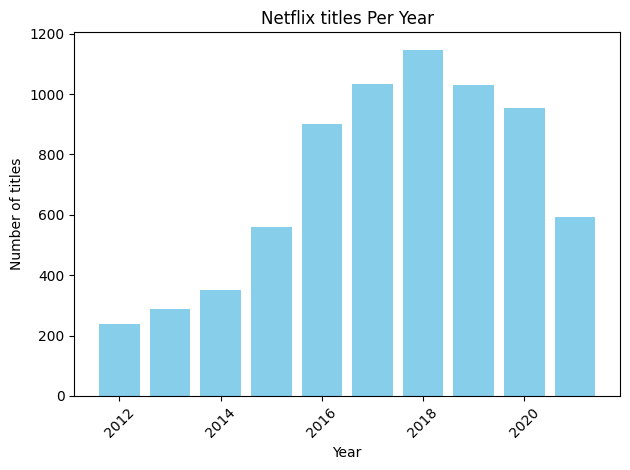

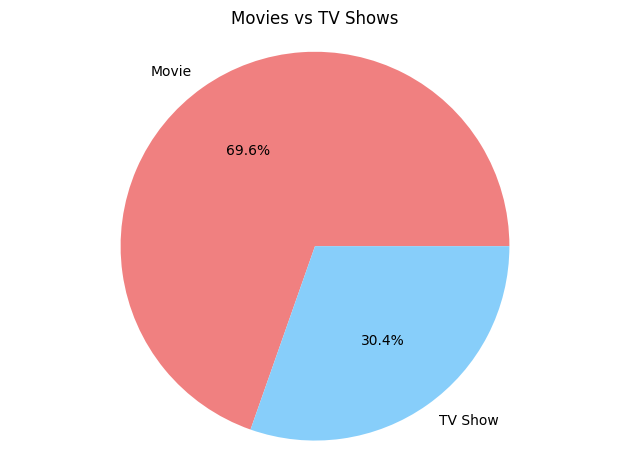

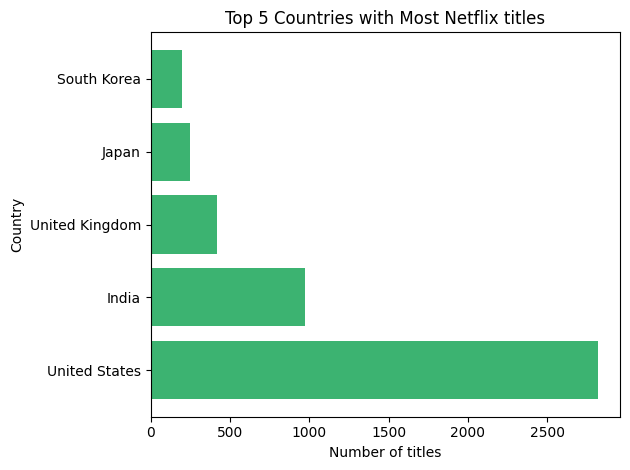

In [13]:
show_chart()

In [14]:
conn.close()  # ბაზის კავშირის დახურვა სამუშაოს ბოლოს